In [1]:
import pandas as pd
import numpy as np
import math
import nltk
import matplotlib.pyplot as plt
from read_data import import_py_file
from warnings import filterwarnings
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
filterwarnings("ignore")
nltk.download('vader_lexicon')

path = '../'
import_py_file(path)

import preprocessed_file as pf

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matyk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
read_data = pf.Data("../data/Top-100 Trending Books.csv",
                    "../data/customer reviews.csv")

In [4]:
# read_data.prepared_date çalıştırılmadan önce hata veriyor
top_books,custrew = read_data.added_features()

# Reviewer Rating per Book Name

In [5]:
custrew.groupby("book name").count()["reviewer"].values

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10], dtype=int64)

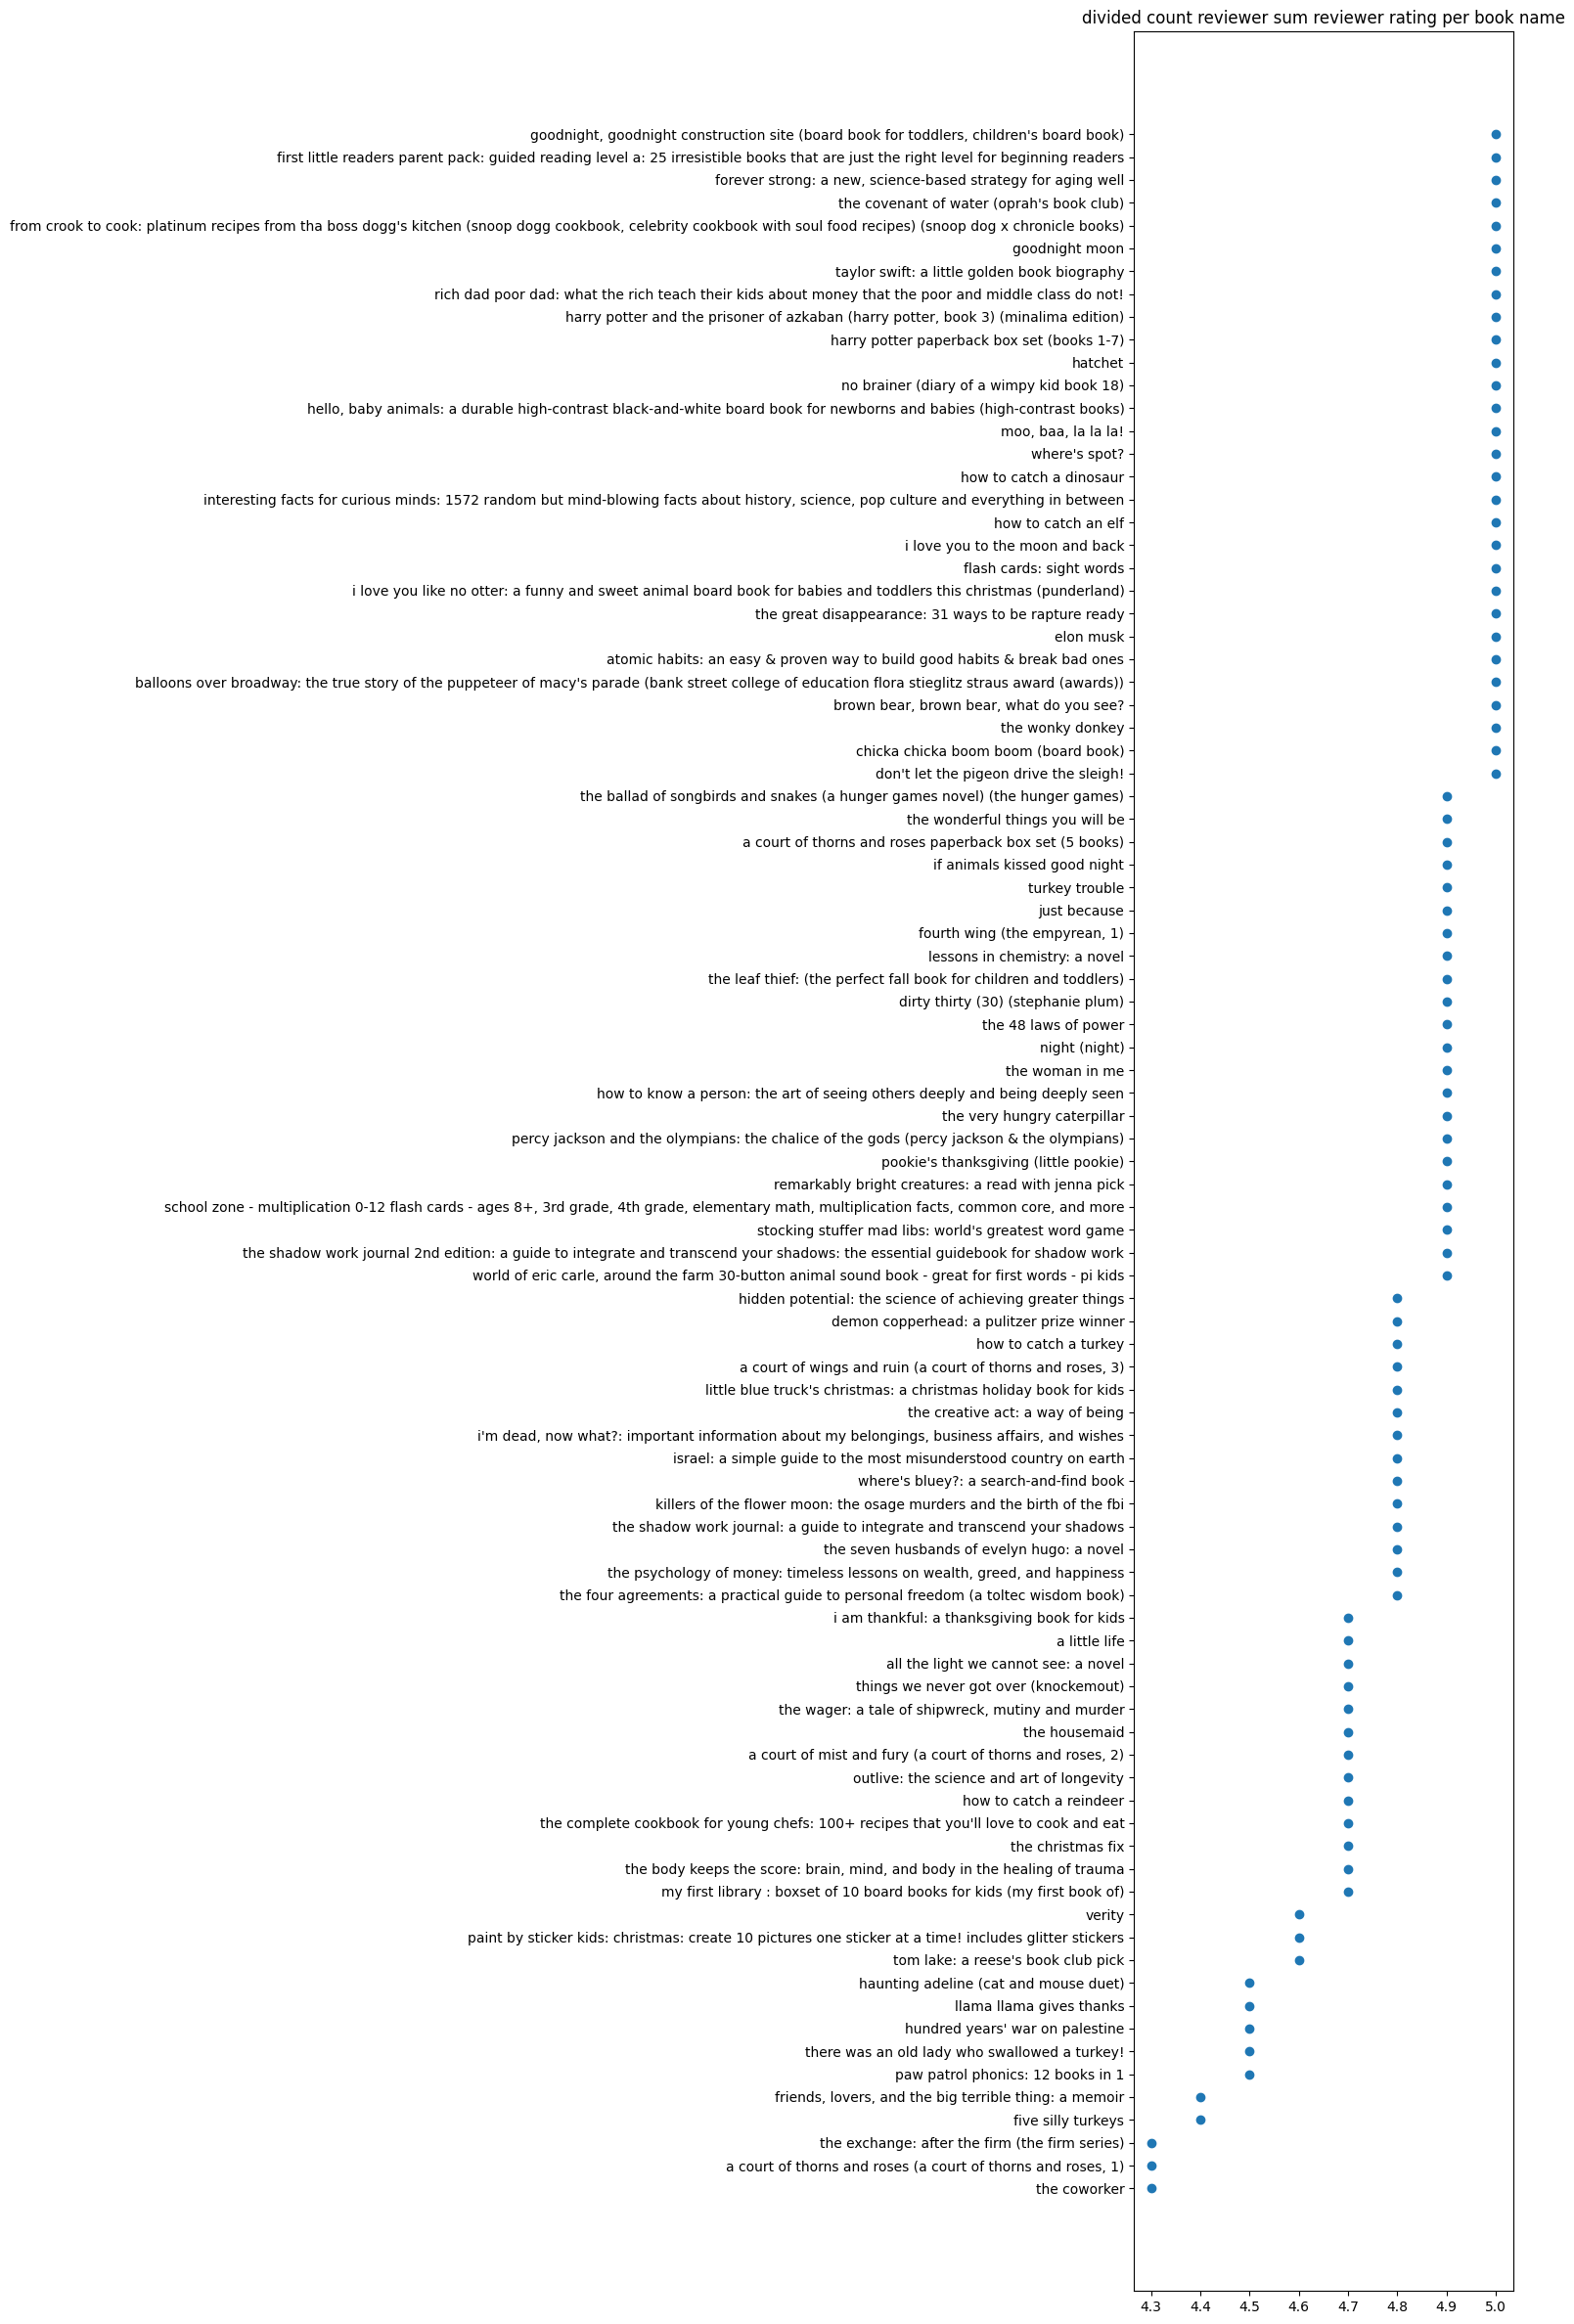

In [6]:
grouped_book_name = custrew.groupby("book name").sum("reviewer rating")["reviewer rating"] / custrew.groupby("book name").count()["reviewer"]
y = grouped_book_name.sort_values().index
x = grouped_book_name.sort_values().values

plt.figure(figsize=(5,30));
plt.title("divided count reviewer sum reviewer rating per book name")
plt.scatter(x,y);

In [7]:
grouped_book_name.value_counts()

5.0    29
4.9    22
4.8    14
4.7    13
4.5     5
4.3     3
4.6     3
4.4     2
Name: count, dtype: int64

# Reviewer Rating - Date

In [8]:
custrew.head(1)

,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN,title length
0,the woman in me,unbelievably impressive. her torn life on paper.,murderess marbie,4,i'm only a third way in. shipped lightening fa...,True,26-10-2023,"reviewed in the united states october 26, 2023",1668009048,7


In [9]:
def get_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    else:
        return "Winter"

def get_quarter(month):
    if 1 <= month <= 3:
        return 1
    elif 4 <= month <= 6:
        return 2
    elif 7 <= month <= 9:
        return 3
    else:
        return 4

In [10]:
custrew[["day","month","year"]] = custrew["date"].str.split("-",expand=True)
custrew[["day","month","year"]] = custrew[["day","month","year"]].astype("int")

In [11]:
custrew['season'] = custrew['month'].apply(get_season)
custrew['quarter'] = custrew['month'].apply(get_quarter)

In [12]:
custrew[["day","month","year","season","quarter","reviewer rating"]]

,day,month,year,season,quarter,reviewer rating
0,26,10,2023,Autumn,4,4
1,6,11,2023,Autumn,4,5
2,1,11,2023,Autumn,4,5
3,25,10,2023,Autumn,4,5
4,1,11,2023,Autumn,4,5
...,...,...,...,...,...,...
915,2,11,2023,Autumn,4,5
916,30,10,2023,Autumn,4,5
917,24,10,2023,Autumn,4,5
918,19,10,2023,Autumn,4,5


In [13]:
custrew.groupby(["year"]).count()[["day","month","season","quarter"]].T

year,2010,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
day,2,2,7,7,13,5,2,13,20,53,796
month,2,2,7,7,13,5,2,13,20,53,796
season,2,2,7,7,13,5,2,13,20,53,796
quarter,2,2,7,7,13,5,2,13,20,53,796


In [14]:
custrew.groupby(["month"]).count()[["day","year","season","quarter"]].T

month,1,2,3,4,5,6,7,8,9,10,11,12
day,20,15,11,10,17,7,22,38,102,432,221,25
year,20,15,11,10,17,7,22,38,102,432,221,25
season,20,15,11,10,17,7,22,38,102,432,221,25
quarter,20,15,11,10,17,7,22,38,102,432,221,25


In [15]:
custrew.groupby(["year","month"]).sum("reviewer rating")

reviewer rating  is_verified  title length   day  quarter
year month                                                           
2010 2                    5            1             5    10        1
     6                    5            1             6     3        2
2014 8                    5            1             4     7        3
     9                    5            1             3    28        3
2015 3                    5            1            10    23        1
...                     ...          ...           ...   ...      ...
2023 7                   73           15           108   232       45
     8                  143           31           225   551       93
     9                  455           95           465  1693      285
     10                2070          421          1831  8487     1696
     11                 921          188           783   640      752

[67 rows x 5 columns]

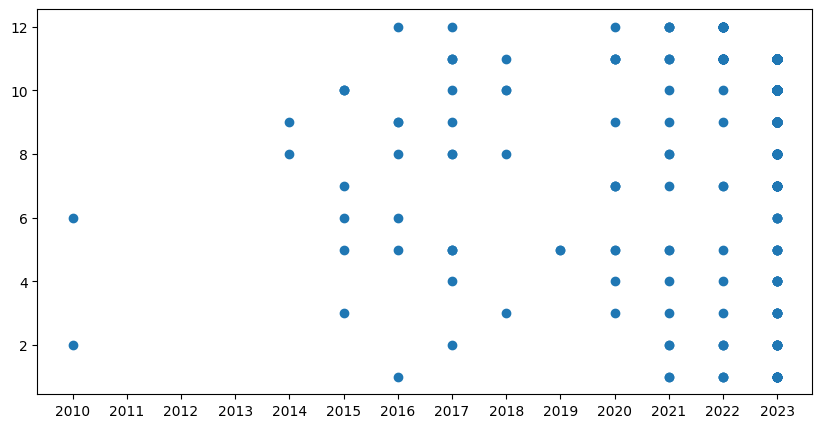

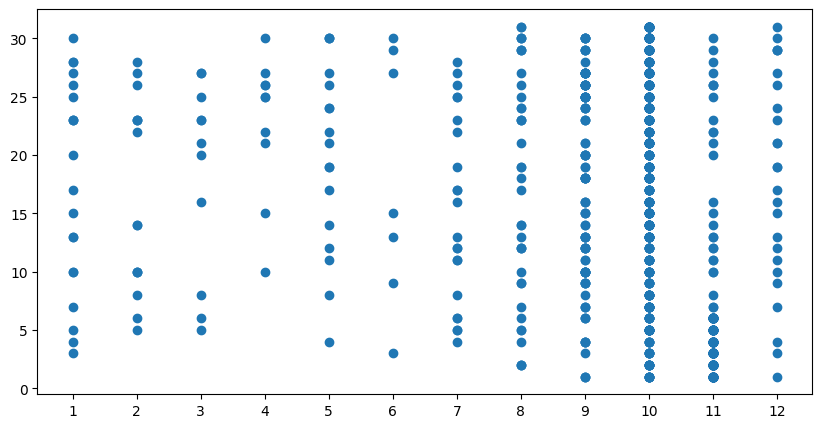

In [16]:
plt.figure(figsize=(10,5));
plt.scatter(custrew["year"],custrew["month"]);
plt.xticks(np.arange(2010,2024));

plt.figure(figsize=(10,5));
plt.scatter(custrew["month"],custrew["day"]);
plt.xticks(np.arange(1,13));

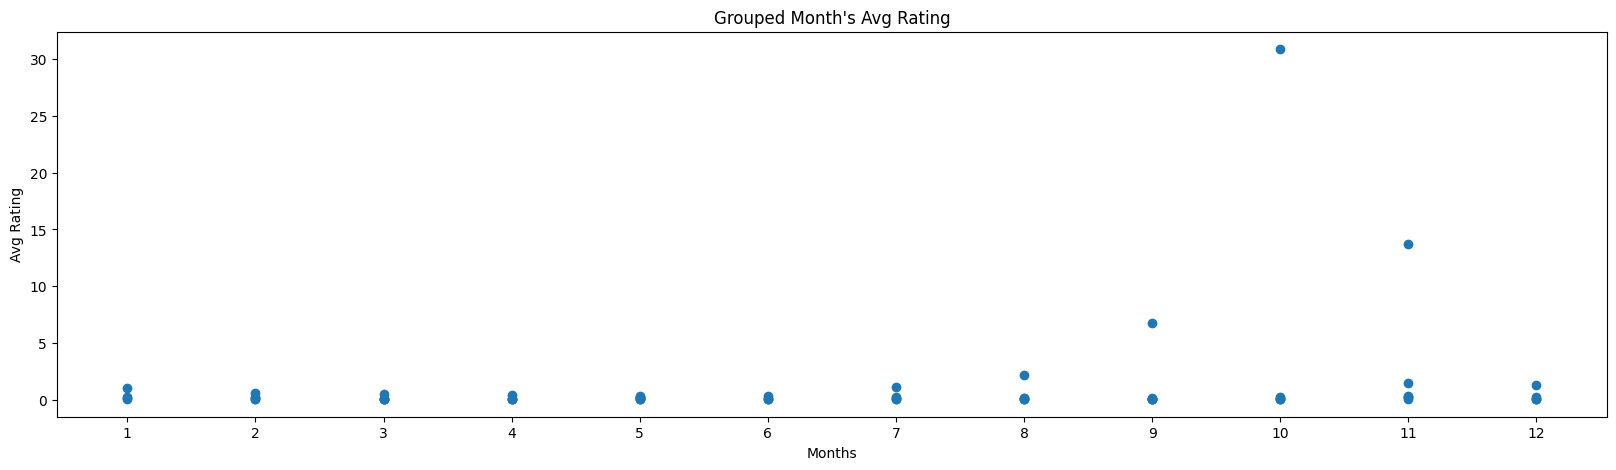

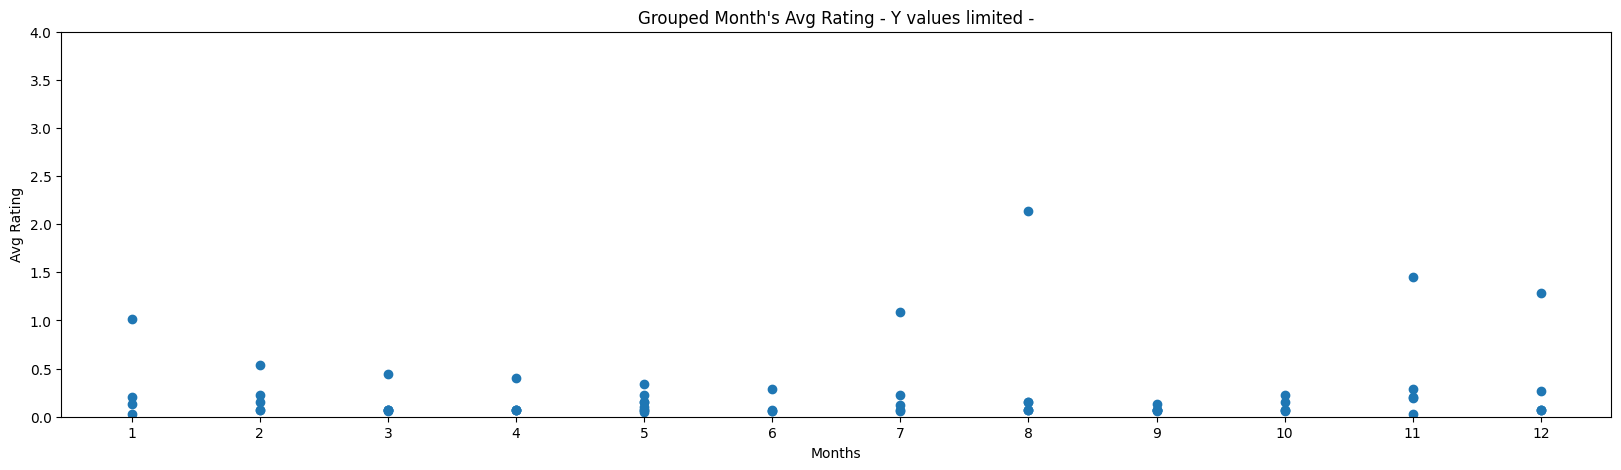

In [17]:
avg_rating = custrew.groupby(["year", "month"]).sum("reviewer rating") / len(
    custrew.groupby(["year", "month"]).sum("reviewer rating")
)
x=avg_rating.index.get_level_values("month")
y=avg_rating["reviewer rating"].values

plt.figure(figsize=(20,5));
plt.title("Grouped Month's Avg Rating");
plt.xlabel("Months");
plt.ylabel("Avg Rating");
plt.scatter(x,y);
plt.xticks(np.arange(1,13));

plt.figure(figsize=(20,5));
plt.title("Grouped Month's Avg Rating - Y values limited -");
plt.xlabel("Months");
plt.ylabel("Avg Rating");
plt.scatter(x,y);
plt.xticks(np.arange(1,13));
plt.ylim(0,4);

# Reviewer - Reviewer Rating

In [18]:
custrew.groupby("reviewer").count()["reviewer rating"].value_counts()

reviewer rating
1     765
2      43
3       4
40      1
13      1
4       1
Name: count, dtype: int64

In [19]:
custrew.groupby(["reviewer","book name"]).sum()[["reviewer rating","date"]].sort_values(by="date")

,,reviewer rating,date
reviewer,book name,,
family man,the wonky donkey,5,01-09-2023
nat,haunting adeline (cat and mouse duet),5,01-09-2023
alyssa charron,little blue truck's christmas: a christmas holiday book for kids,5,01-09-2023
customer,"i'm dead, now what?: important information about my belongings, business affairs, and wishes",5,01-10-2023
alice chan,"hello, baby animals: a durable high-contrast black-and-white board book for newborns and babies (high-contrast books)",5,01-10-2023
...,...,...,...
custeemade,"harry potter and the prisoner of azkaban (harry potter, book 3) (minalima edition)",5,31-10-2023
janna,israel: a simple guide to the most misunderstood country on earth,5,31-10-2023
jt,my first library : boxset of 10 board books for kids (my first book of),5,31-10-2023


In [20]:
custrew.groupby(["season","reviewer","book name"]).sum()[["reviewer rating"]]

reviewer rating
season reviewer        book name                                                          
Autumn *at             elon musk                                                         5
       a reader        israel: a simple guide to the most misunderstoo...                5
       a reviewer      llama llama gives thanks                                          4
       a. k. p.        world of eric carle, around the farm 30-button ...                4
       a. slater       just because                                                      5
...                                                                                    ...
Winter summer pomander little blue truck's christmas: a christmas holi...                4
       t.k:)           there was an old lady who swallowed a turkey!                     5
       taylor chapman  how to catch a reindeer                                           3
       tim moulin      how to catch a turkey                                             5
       vanessa sawade  pookie's thanksgiving (little pookie)                             5

[904 rows x 1 columns]

# Review Title - Reviewer Rating

In [21]:
custrew.head(1)

,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN,title length,day,month,year,season,quarter
0,the woman in me,unbelievably impressive. her torn life on paper.,murderess marbie,4,i'm only a third way in. shipped lightening fa...,True,26-10-2023,"reviewed in the united states october 26, 2023",1668009048,7,26,10,2023,Autumn,4


In [22]:
custrew[["reviewer rating","review title"]].sort_values(by="reviewer rating").head(2)

,reviewer rating,review title
767,2,not a thanksgiving book!
61,2,it’s as if he sacrificed characters for beauti...


In [23]:
analyzer = SentimentIntensityAnalyzer()

def duygu_analizi(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Pozitif'
    elif sentiment['compound'] <= -0.05:
        return 'Negatif'
    else:
        return 'Nötr'

custrew["title sentiment result"] = custrew["review title"].apply(duygu_analizi)

In [24]:
custrew[["reviewer rating","title sentiment result","review title"]].groupby(["reviewer rating","title sentiment result"]).count()

review title
reviewer rating title sentiment result              
2               Nötr                               3
                Pozitif                            1
3               Negatif                            3
                Nötr                               3
                Pozitif                            2
4               Negatif                           18
                Nötr                              42
                Pozitif                           72
5               Negatif                           45
                Nötr                             202
                Pozitif                          529

# Reviewer Description - Reviewer Rating

In [25]:
custrew.head(1)

,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN,title length,day,month,year,season,quarter,title sentiment result
0,the woman in me,unbelievably impressive. her torn life on paper.,murderess marbie,4,i'm only a third way in. shipped lightening fa...,True,26-10-2023,"reviewed in the united states october 26, 2023",1668009048,7,26,10,2023,Autumn,4,Pozitif


In [26]:
custrew["desc sentiment result"] = custrew["review description"].apply(duygu_analizi)

In [27]:
custrew[["reviewer rating","title sentiment result","desc sentiment result"]] \
    .groupby(["title sentiment result","desc sentiment result"]).sum()

reviewer rating
title sentiment result desc sentiment result                 
Negatif                Negatif                            116
                       Nötr                                 9
                       Pozitif                            181
Nötr                   Negatif                            138
                       Nötr                                39
                       Pozitif                           1016
Pozitif                Negatif                            138
                       Nötr                                59
                       Pozitif                           2744

In [37]:
custrew[["reviewer rating","title sentiment result","desc sentiment result","review title","review description"]]

,reviewer rating,title sentiment result,desc sentiment result,review title,review description
0,4,Pozitif,Pozitif,unbelievably impressive. her torn life on paper.,i'm only a third way in. shipped lightening fa...
1,5,Negatif,Negatif,what a heartbreaking story,"""there have been so many times when i was scar..."
2,5,Pozitif,Negatif,britney you are so invincible! you are an insp...,the media could not be loaded. i personally ha...
3,5,Negatif,Pozitif,"fast read, sad story",i have been a fan of britney's music since the...
4,5,Pozitif,Pozitif,"buy it, it’s worth the read!","whether or not you’re a fan, it’s a great read..."
...,...,...,...,...,...
915,5,Pozitif,Pozitif,the best child/grandmother book ever written,this is exactly the kind of book children unde...
916,5,Pozitif,Pozitif,great book,we get this book for all our grandchildren the...
917,5,Pozitif,Pozitif,"fun book, makes you laugh",i saw a grandma reading this book to her grand...
918,5,Pozitif,Pozitif,cutest beck ever!!,i have ordered this book over and over to give...


In [28]:
custrew["reviewer rating"].value_counts()

reviewer rating
5    776
4    132
3      8
2      4
Name: count, dtype: int64

In [29]:
custrew[["rating 2","rating 3","rating 4","rating 5"]] = pd.get_dummies(custrew["reviewer rating"]).astype("int")

In [30]:
custrew[["rating 2","rating 3","rating 4","rating 5",
         "title sentiment result","desc sentiment result"]] \
        .groupby(["title sentiment result","desc sentiment result"]).sum()

rating 2  rating 3  rating 4  \
title sentiment result desc sentiment result                                 
Negatif                Negatif                       0         1         7   
                       Nötr                          0         0         1   
                       Pozitif                       0         2        10   
Nötr                   Negatif                       0         0         7   
                       Nötr                          0         0         1   
                       Pozitif                       3         3        34   
Pozitif                Negatif                       0         1         5   
                       Nötr                          0         0         1   
                       Pozitif                       1         1        66   

                                              rating 5  
title sentiment result desc sentiment result            
Negatif                Negatif                      17  
                       Nötr                          1  
                       Pozitif                      27  
Nötr                   Negatif                      22  
                       Nötr                          7  
                       Pozitif                     173  
Pozitif                Negatif                      23  
                       Nötr                         11  
                       Pozitif                     495

In [31]:
custrew["reviewer rating"].value_counts()

reviewer rating
5    776
4    132
3      8
2      4
Name: count, dtype: int64

<Axes: xlabel='reviewer rating'>

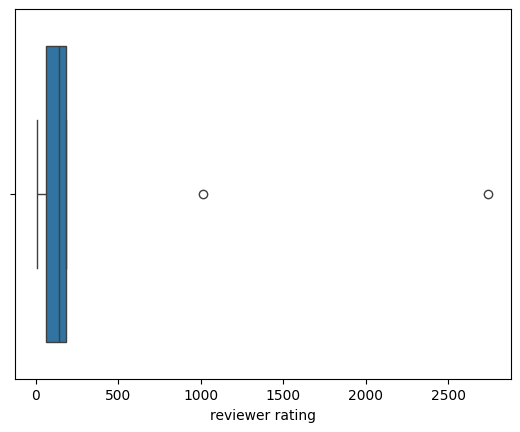

In [53]:
import seaborn as sbn
data = custrew[["reviewer rating","title sentiment result","desc sentiment result"]] \
    .groupby(["title sentiment result","desc sentiment result"]).sum()
sbn.boxplot(x=data["reviewer rating"])

<Axes: ylabel='reviewer rating'>

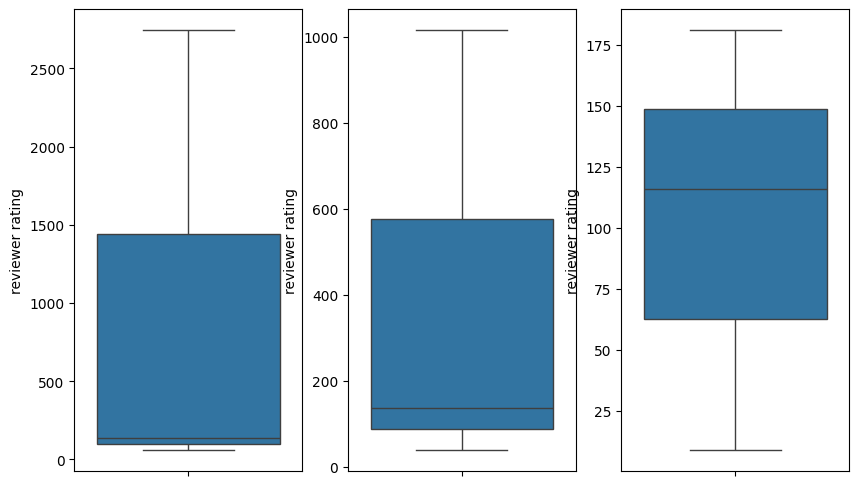

In [68]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sbn.boxplot(data[data.index.get_level_values("title sentiment result")=="Pozitif"]["reviewer rating"])
plt.subplot(1, 3, 2)
sbn.boxplot(data[data.index.get_level_values("title sentiment result")=="Nötr"]["reviewer rating"])
plt.subplot(1, 3, 3)
sbn.boxplot(data[data.index.get_level_values("title sentiment result")=="Negatif"]["reviewer rating"])

In [42]:
custrew.to_csv("../data/ready for model/custrew.csv")
top_books.to_csv("../data/ready for model/top_books.csv")